In [ ]:
!pip install yfinance -q

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (15, 7)

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import plotly.express as px

### Utility functions to fetch data fron **yfinance**

In [ ]:
def get_ticker_data(yf_symbol, start="2014-01-01", end="2024-03-31"):
  df = pdr.get_data_yahoo(yf_symbol, start=start, end=end)
  df['symbol'] = yf_symbol
  return df

def get_market_cap(yf_symbol):
  ticker = yf.Ticker(yf_symbol)
  res = {}
  res[yf_symbol] = ticker.get_info()['marketCap']
  return res

### Metadata about the Nifty 50 stocks.

This file consists of the constituent stocks of current Nifty 50 stocks and its addictional information such as

1. Stock's Industry
2. Code
3. Symbol etc.

In [ ]:
url = 'https://github.com/sai-phyo-hein/runtime_test/blob/sai_phyo_hein_branch/nifty_50_metadata.csv?raw=true'

In [ ]:
nifty_50 = pd.read_csv(url)
nifty_50.rename(columns={'Company Name': 'company_name', 'Industry': 'industry', 'Symbol': 'symbol',
                         'Series': 'series', 'ISIN Code': 'isin_code'}, inplace=True)

nifty_50['yf_symbol'] = nifty_50['symbol'] + '.NS'
nifty_50.head(5)

,company_name,industry,symbol,series,isin_code,yf_symbol
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS


### Get historical data for a given ticker

In [ ]:
get_ticker_data(nifty_50['yf_symbol'][0])

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2014-01-01,40.433960,41.368938,40.204048,41.192673,37.967480,7564701,ADANIENT.NS
2014-01-02,40.464615,41.192673,38.824574,39.138786,36.074398,17188171,ADANIENT.NS
2014-01-03,38.778587,39.246078,37.475750,38.065861,35.085484,11525782,ADANIENT.NS
2014-01-06,37.996887,39.069813,37.506405,38.632977,35.608196,10660990,ADANIENT.NS
2014-01-07,38.832237,39.069813,36.939289,37.084900,34.181324,11002957,ADANIENT.NS
...,...,...,...,...,...,...,...
2024-03-21,3089.550049,3107.100098,3059.600098,3066.500000,3066.500000,1175751,ADANIENT.NS
2024-03-22,3066.550049,3128.949951,3048.050049,3107.699951,3107.699951,951557,ADANIENT.NS
2024-03-26,3100.500000,3171.949951,3089.100098,3109.949951,3109.949951,937103,ADANIENT.NS


### Constituent of Nifty 50 index

In [ ]:
list_sym = list(nifty_50['yf_symbol'])
list_sym

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

### Fetch the market cap for each of the stocks

In [ ]:
nifty_50['market_cap'] = nifty_50['yf_symbol'].apply(lambda x: get_market_cap(x)[x])
nifty_50

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3489540079616
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS,2905388351488
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,856239636480
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2701537312768
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3527975895040
5,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2459296595968
6,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4165220958208
7,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2533139939328
8,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1363917406208
9,Bharti Airtel Ltd.,Telecommunication,BHARTIARTL,EQ,INE397D01024,BHARTIARTL.NS,8029732864000


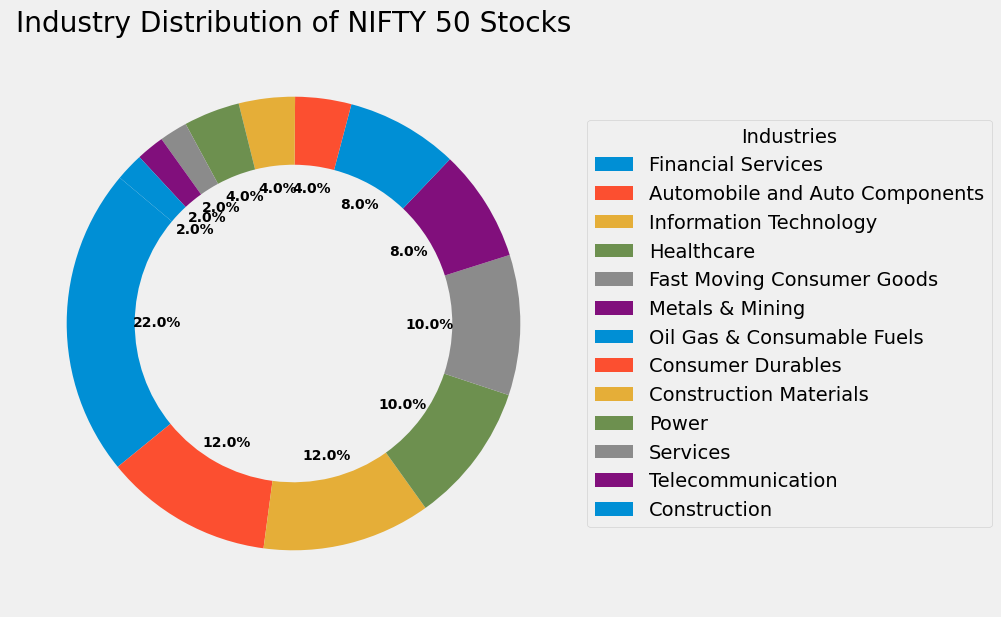

In [ ]:
# Calculate the percentage of each industryof the overall
industry_distribution = nifty_50['industry'].value_counts(normalize=True) * 100

# Defining the properties of text annotations in the pie chart
wedges, texts, autotexts = plt.pie(
    industry_distribution,
    autopct='%1.1f%%',
    shadow=False,
    startangle=140,
    textprops=dict(color="k"),
    wedgeprops=dict(width=0.3)
)

# Adding legend to indicate the industry
plt.legend(
    wedges,
    industry_distribution.index,
    title="Industries",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=10, weight="bold")
plt.title('Industry Distribution of NIFTY 50 Stocks')
plt.show()

In [ ]:
nifty50_tree = nifty_50[['yf_symbol', 'industry', 'market_cap']]
fig = px.treemap(nifty50_tree, path=['industry', 'yf_symbol'], values='market_cap',
                 title='NIFTY 50 Distribution by Industry')
fig.show()

In [ ]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  50 non-null     object
 1   industry      50 non-null     object
 2   symbol        50 non-null     object
 3   series        50 non-null     object
 4   isin_code     50 non-null     object
 5   yf_symbol     50 non-null     object
 6   market_cap    50 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


### Number of stocks per Sector

In [ ]:
stocks_per_sector = nifty_50['industry'].value_counts().to_frame().reset_index()
stocks_per_sector

,industry,count
0,Financial Services,11
1,Automobile and Auto Components,6
2,Information Technology,6
3,Healthcare,5
4,Fast Moving Consumer Goods,5
5,Metals & Mining,4
6,Oil Gas & Consumable Fuels,4
7,Consumer Durables,2
8,Construction Materials,2
9,Power,2


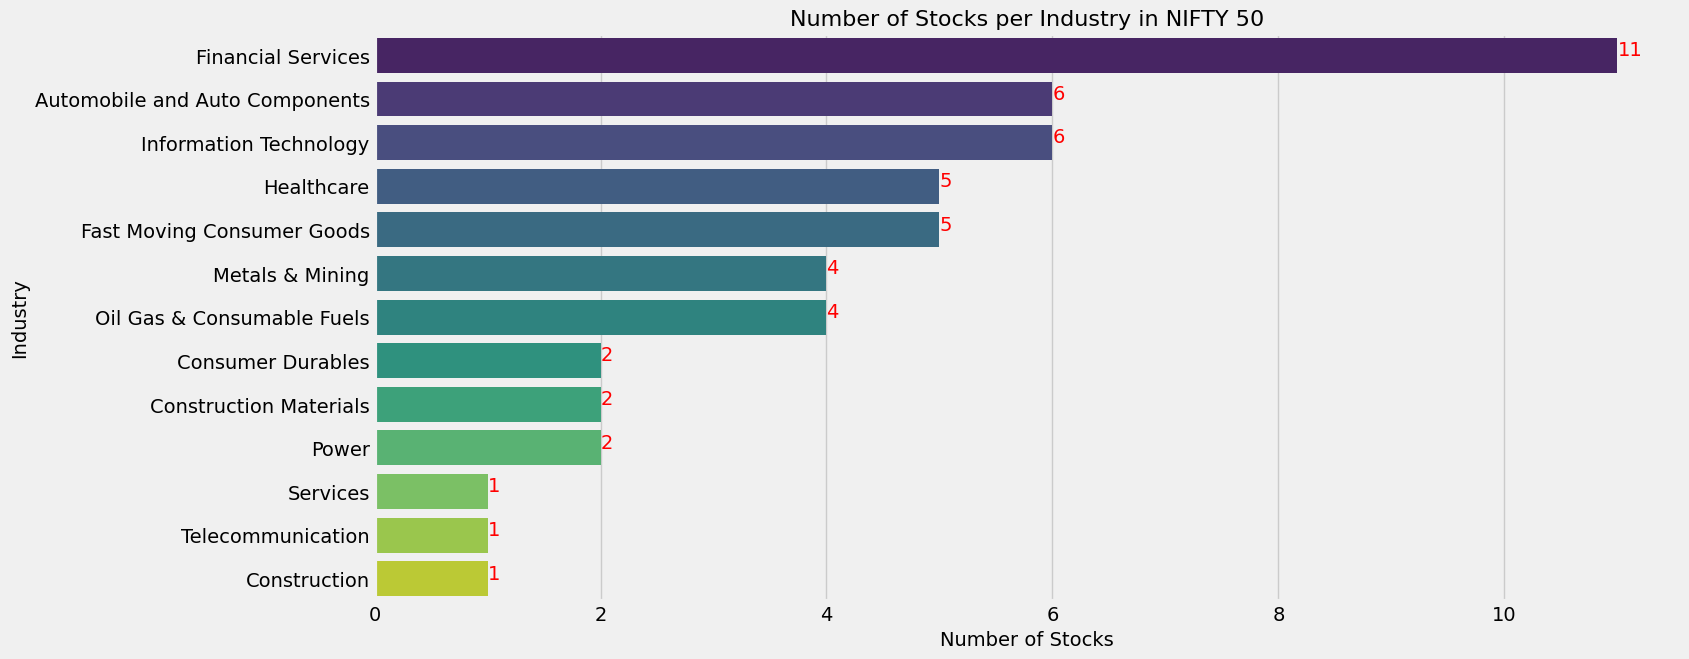

In [ ]:
# Rename the columns for better readability
stocks_per_sector.columns = ['Industry', 'Number of Stocks']

# Create the bar plot
ax = sns.barplot(x='Number of Stocks', y='Industry', data=stocks_per_sector, palette='viridis')

for index, value in enumerate(stocks_per_sector['Number of Stocks']):
    ax.text(value, index, str(value), color='red')

# Add titles and labels
plt.title('Number of Stocks per Industry in NIFTY 50', fontsize=16)
plt.xlabel('Number of Stocks', fontsize=14)
plt.ylabel('Industry', fontsize=14)

# Display the plot
plt.show()

We see that stocks from "Financial" is the majority contributor to the NITFY 50

### Stock selection process for constructing the portfolio

We have planned to construct an equity portfolio consist of stocks from diverse sector in order to induct "risk diversification". Below are the steps in selecting the stocks for the "equity portfolio"

1. Select the **top two stocks** from each sector from the NIFTY 50 constituent. Here the top 2 selection is based on the criteria of market capitalization.

2. We will select the stocks directly if its the sole member of a particular sector. For example: Telecommunication sector has just one stock - **Bharti Airtel**. Hence it will be selected implicitly

### Download all stock data starting from 2014 to 2024-March

In [ ]:
stock_data = yf.download(
    nifty_50['yf_symbol'].unique().tolist(),
    start = '2014-01-01',
    end = '2024-03-31'
)['Adj Close']

[*********************100%%**********************]  50 of 50 completed


### Remove stocks which is not been part of NIFTY 50 for the past 10 years

In [ ]:
stock_data = stock_data.dropna(axis = 1)  #removing tickers with inconsistent trading days

In [ ]:
stock_data.shape

(2525, 45)

### Computing the correlation on the stock returns

In [ ]:
corr = stock_data.pct_change().dropna().corr()

# self correlations are always 1 and have to remove from consideration
for i in range(corr.shape[0]):
    corr.iloc[i, i] = 0.0

In [ ]:
corr = corr[corr < 0.5].copy()

# selecting only the tickers with correlations to other < the threshold
corr.dropna(thresh = stock_data.shape[1], axis = 1, inplace = True)
corr

Ticker,APOLLOHOSP.NS,ASIANPAINT.NS,BHARTIARTL.NS,BPCL.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,HINDUNILVR.NS,...,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TITAN.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ADANIENT.NS,0.197662,0.219179,0.218618,0.271449,0.171231,0.245095,0.211836,0.122516,0.243294,0.170242,...,0.303497,0.180347,0.261644,0.254581,0.219610,0.296504,0.217884,0.319770,0.322874,0.236761
ADANIPORTS.NS,0.228402,0.268824,0.255466,0.298951,0.193051,0.285982,0.229208,0.157933,0.278476,0.189148,...,0.340523,0.186071,0.321055,0.295921,0.245032,0.339347,0.226357,0.359316,0.343198,0.276192
APOLLOHOSP.NS,0.000000,0.225998,0.156127,0.183013,0.224300,0.156509,0.237456,0.228602,0.232337,0.206589,...,0.234561,0.218294,0.151120,0.155055,0.142324,0.218001,0.229394,0.264403,0.214587,0.205202
ASIANPAINT.NS,0.225998,0.000000,0.211481,0.276709,0.152686,0.177929,0.211733,0.162778,0.329074,0.374128,...,0.391237,0.328901,0.196422,0.133564,0.164073,0.309191,0.164323,0.329295,0.250967,0.310968
AXISBANK.NS,0.224487,0.292831,0.253679,0.334657,0.192122,0.279339,0.182555,0.141239,0.346597,0.229416,...,0.438214,0.186182,0.303530,0.284418,0.247598,0.359278,0.197237,0.335803,0.386981,0.311796
BAJAJ-AUTO.NS,0.219191,0.301895,0.263552,0.263596,0.199997,0.217063,0.223436,0.202825,0.391888,0.266571,...,0.441199,0.199944,0.236997,0.249333,0.215630,0.301133,0.200093,0.290899,0.352907,0.299037
BAJAJFINSV.NS,0.270328,0.324285,0.262333,0.320532,0.169510,0.242674,0.188383,0.129404,0.353090,0.226791,...,0.389341,0.214639,0.273970,0.239970,0.215447,0.338782,0.207583,0.371875,0.329804,0.327618
BAJFINANCE.NS,0.278454,0.320472,0.240486,0.293217,0.141461,0.219240,0.186537,0.120449,0.368121,0.245305,...,0.408029,0.208973,0.261006,0.222067,0.199121,0.330662,0.184996,0.362694,0.339139,0.316754
BHARTIARTL.NS,0.156127,0.211481,0.000000,0.212251,0.182304,0.168942,0.181222,0.118028,0.226802,0.186009,...,0.262951,0.155396,0.228072,0.213905,0.209360,0.269829,0.167205,0.250101,0.255717,0.200348


In [ ]:
selected_tickers = nifty_50[
    nifty_50.yf_symbol.isin(corr.columns)
].sort_values('market_cap', ascending = False).groupby('industry').head(3).yf_symbol.unique().tolist()

selected_tickers

['RELIANCE.NS',
 'BHARTIARTL.NS',
 'HINDUNILVR.NS',
 'ITC.NS',
 'MARUTI.NS',
 'SUNPHARMA.NS',
 'NTPC.NS',
 'ONGC.NS',
 'TATAMOTORS.NS',
 'M&M.NS',
 'TITAN.NS',
 'POWERGRID.NS',
 'COALINDIA.NS',
 'ASIANPAINT.NS',
 'NESTLEIND.NS',
 'CIPLA.NS',
 'DIVISLAB.NS']

In [ ]:
len(selected_tickers)

17

In [ ]:
nifty_50.columns

Index(['company_name', 'industry', 'symbol', 'series', 'isin_code',
       'yf_symbol', 'market_cap'],
      dtype='object')

In [ ]:
portfolio_stocks = nifty_50[nifty_50['yf_symbol'].isin(selected_tickers)].reset_index(drop=True)
portfolio_stocks

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2701537312768
1,Bharti Airtel Ltd.,Telecommunication,BHARTIARTL,EQ,INE397D01024,BHARTIARTL.NS,8029732864000
2,Cipla Ltd.,Healthcare,CIPLA,EQ,INE059A01026,CIPLA.NS,1133089521664
3,Coal India Ltd.,Oil Gas & Consumable Fuels,COALINDIA,EQ,INE522F01014,COALINDIA.NS,2893093535744
4,Divi's Laboratories Ltd.,Healthcare,DIVISLAB,EQ,INE361B01024,DIVISLAB.NS,1042762170368
5,Hindustan Unilever Ltd.,Fast Moving Consumer Goods,HINDUNILVR,EQ,INE030A01027,HINDUNILVR.NS,5476189208576
6,ITC Ltd.,Fast Moving Consumer Goods,ITC,EQ,INE154A01025,ITC.NS,5452068814848
7,Mahindra & Mahindra Ltd.,Automobile and Auto Components,M&M,EQ,INE101A01026,M&M.NS,2999716937728
8,Maruti Suzuki India Ltd.,Automobile and Auto Components,MARUTI,EQ,INE585B01010,MARUTI.NS,3965250699264
9,NTPC Ltd.,Power,NTPC,EQ,INE733E01010,NTPC.NS,3548981231616


### Data visualization

In [ ]:
stock_data[selected_tickers]

Ticker,RELIANCE.NS,BHARTIARTL.NS,HINDUNILVR.NS,ITC.NS,MARUTI.NS,SUNPHARMA.NS,NTPC.NS,ONGC.NS,TATAMOTORS.NS,M&M.NS,TITAN.NS,POWERGRID.NS,COALINDIA.NS,ASIANPAINT.NS,NESTLEIND.NS,CIPLA.NS,DIVISLAB.NS
Date,,,,,,,,,,,,,,,,,
2014-01-01,379.456055,288.068970,487.238159,162.499054,1626.533569,533.223450,77.761528,117.374237,368.095581,435.148438,220.363129,36.895309,120.609093,464.536255,471.957001,383.688141,560.222290
2014-01-02,373.564362,280.350159,478.767792,158.744019,1630.590820,534.620972,75.904701,114.766815,365.543121,429.686066,216.114365,37.785252,116.873611,451.336823,469.144958,374.662933,563.486694
2014-01-03,368.974884,280.904510,480.981171,158.643234,1658.437256,540.070984,74.132286,112.363113,356.069519,413.230408,217.116913,37.340286,114.582787,455.008575,473.893921,374.137695,570.494873
2014-01-06,365.004456,280.904510,479.704102,159.096832,1666.827881,548.036499,74.357346,114.461250,360.241821,411.004150,217.498825,37.043617,114.046173,456.077515,478.696411,373.994476,572.481018
2014-01-07,359.518402,282.908875,475.830719,159.626083,1701.913086,553.579773,73.063187,112.546448,358.425629,414.538574,215.827942,36.635735,113.654091,455.426727,478.185516,373.278168,561.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,2901.949951,1220.800049,2242.350098,421.250000,11908.150391,1565.199951,325.000000,262.950012,964.900024,1865.849976,3627.550049,273.750000,432.049988,2821.149902,2553.649902,1448.699951,3465.300049
2024-03-22,2910.050049,1236.099976,2256.550049,428.600006,12337.700195,1608.900024,324.750000,263.250000,979.799988,1878.800049,3706.699951,275.750000,431.950012,2841.500000,2573.399902,1481.250000,3431.449951
2024-03-26,2883.149902,1213.099976,2240.000000,427.649994,12250.549805,1598.099976,329.100006,265.500000,986.200012,1863.949951,3698.199951,270.049988,435.950012,2814.649902,2586.100098,1472.250000,3391.000000


In [ ]:
returns = stock_data[selected_tickers].pct_change().dropna()
desc_stats = returns.describe()
desc_stats

Ticker,RELIANCE.NS,BHARTIARTL.NS,HINDUNILVR.NS,ITC.NS,MARUTI.NS,SUNPHARMA.NS,NTPC.NS,ONGC.NS,TATAMOTORS.NS,M&M.NS,TITAN.NS,POWERGRID.NS,COALINDIA.NS,ASIANPAINT.NS,NESTLEIND.NS,CIPLA.NS,DIVISLAB.NS
count,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000
mean,0.000968,0.000753,0.000710,0.000511,0.000968,0.000615,0.000720,0.000554,0.000734,0.000767,0.001314,0.000919,0.000682,0.000847,0.000787,0.000680,0.000917
std,0.017494,0.018949,0.014245,0.015896,0.017713,0.018658,0.016734,0.021295,0.026189,0.018927,0.019318,0.015519,0.018742,0.016055,0.014712,0.016792,0.019748
min,-0.131539,-0.119529,-0.088707,-0.128143,-0.169092,-0.150580,-0.117403,-0.157627,-0.175827,-0.092956,-0.122560,-0.110185,-0.080059,-0.140279,-0.090589,-0.088256,-0.222648
25%,-0.008615,-0.009740,-0.007160,-0.007500,-0.007784,-0.009149,-0.008581,-0.010846,-0.012300,-0.009419,-0.008524,-0.007858,-0.009775,-0.007727,-0.007539,-0.008267,-0.008813
50%,0.000620,0.000000,0.000047,0.000195,0.000307,0.000371,0.000305,0.000615,0.000100,0.000581,0.000729,0.000258,0.000175,0.000531,0.000169,-0.000324,0.000778
75%,0.010055,0.010100,0.007911,0.008645,0.009117,0.009941,0.010045,0.011233,0.013368,0.010260,0.010176,0.009440,0.010240,0.009076,0.007904,0.008714,0.010476
max,0.147180,0.112908,0.134998,0.100457,0.135149,0.110121,0.106383,0.185094,0.204467,0.168505,0.187874,0.072209,0.126086,0.088527,0.128040,0.130375,0.161587


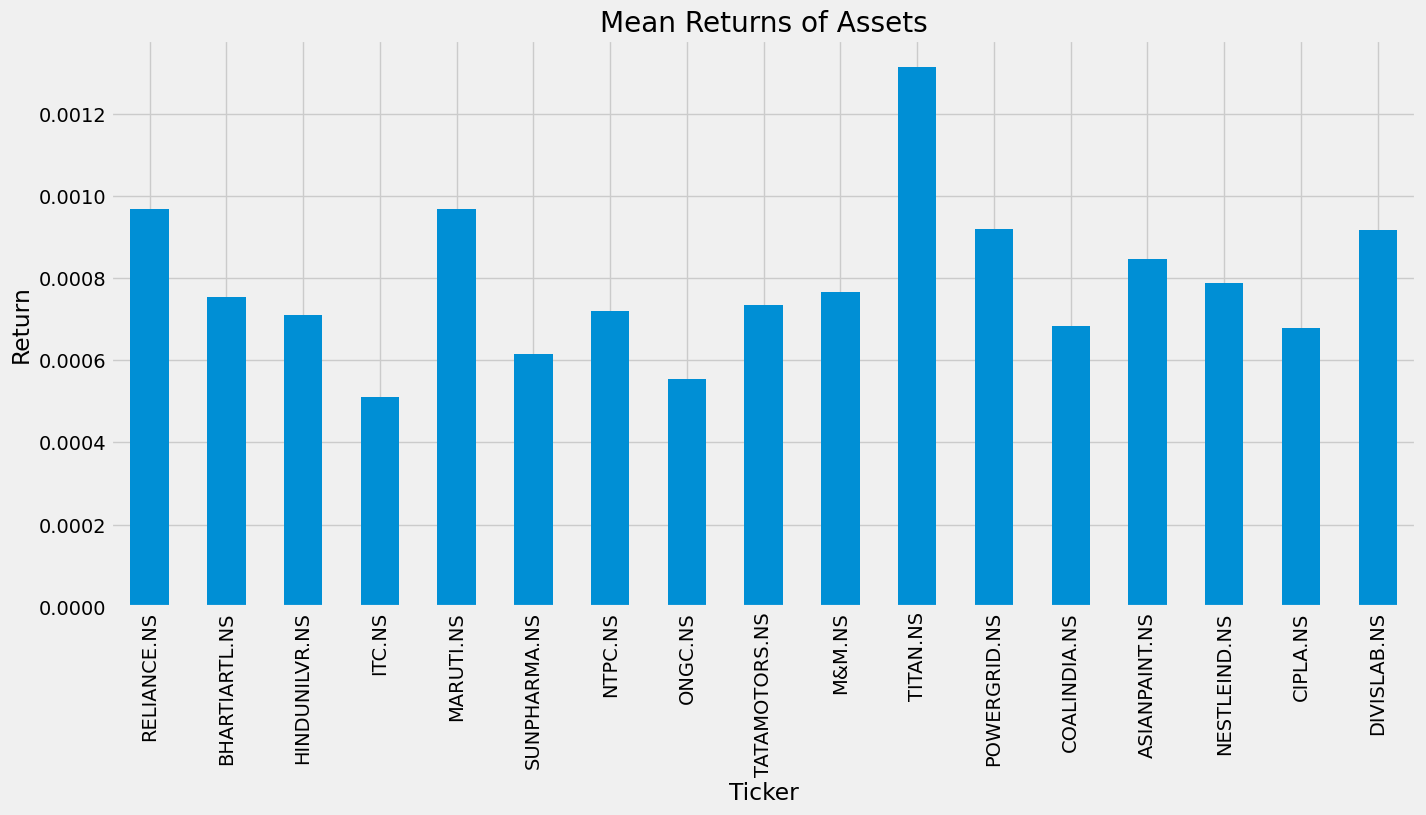

In [ ]:
returns.mean().plot(kind = 'bar')
plt.title('Mean Returns of Assets')
plt.ylabel('Return')
plt.show()

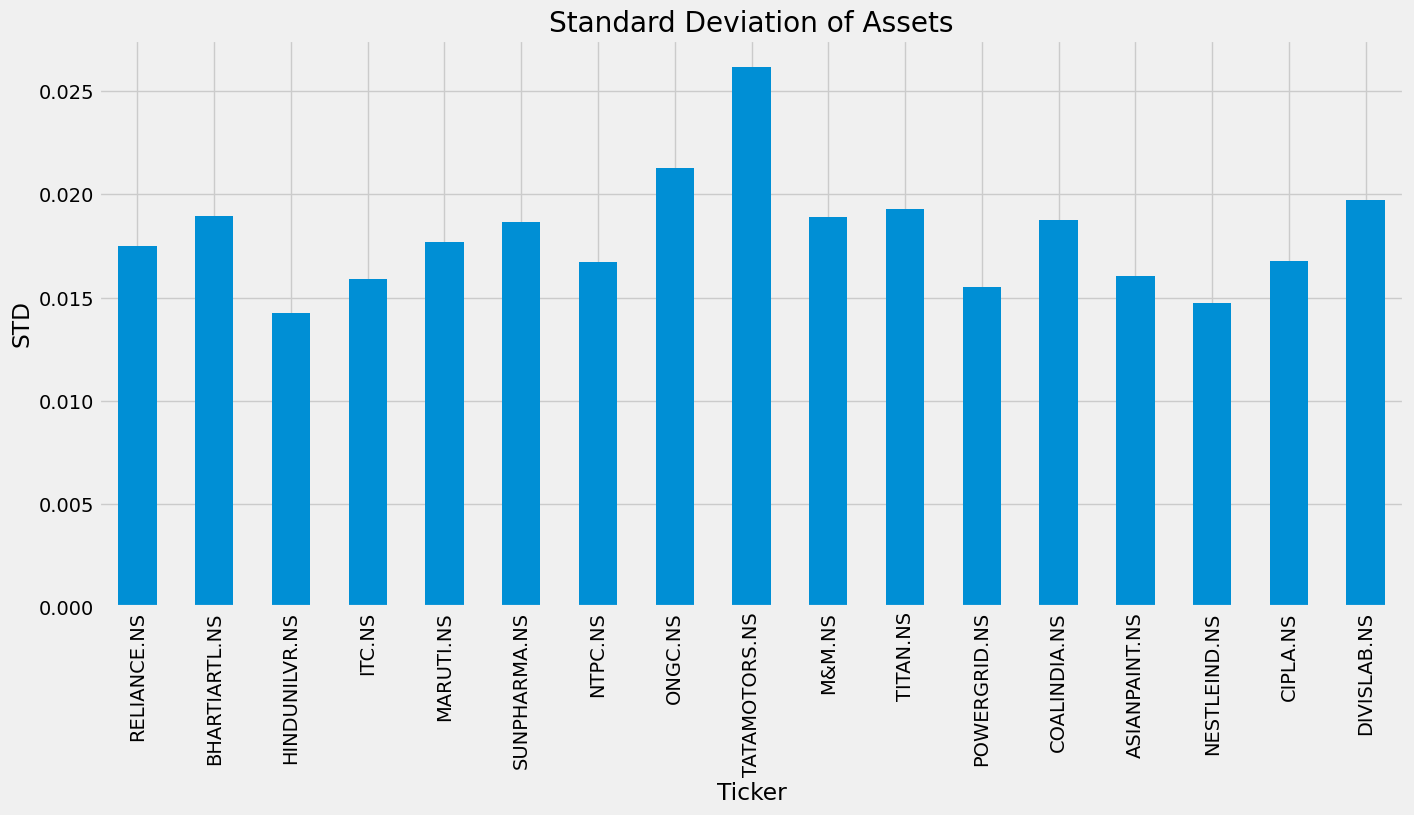

In [ ]:
returns.std().plot(kind = 'bar')
plt.title('Standard Deviation of Assets')
plt.ylabel('STD')
plt.show()

In [ ]:
returns.describe().loc[['mean', 'std']].min(axis = 1), returns.describe().loc[['mean', 'std']].max(axis = 1)

(mean    0.000511
 std     0.014245
 dtype: float64,
 mean    0.001314
 std     0.026189
 dtype: float64)

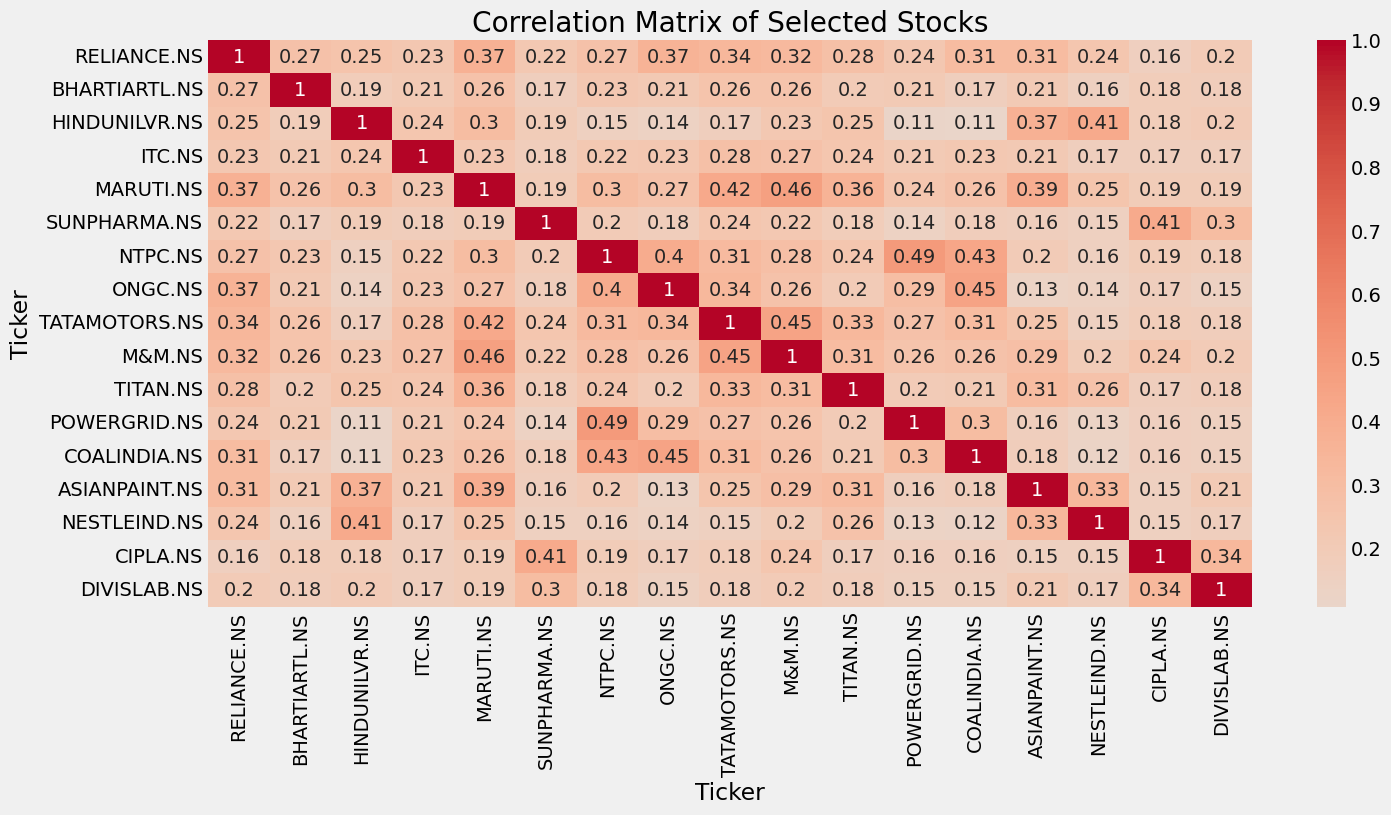

In [ ]:
corr_selected = returns.corr()
sns.heatmap(corr_selected, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Stocks')
plt.show()


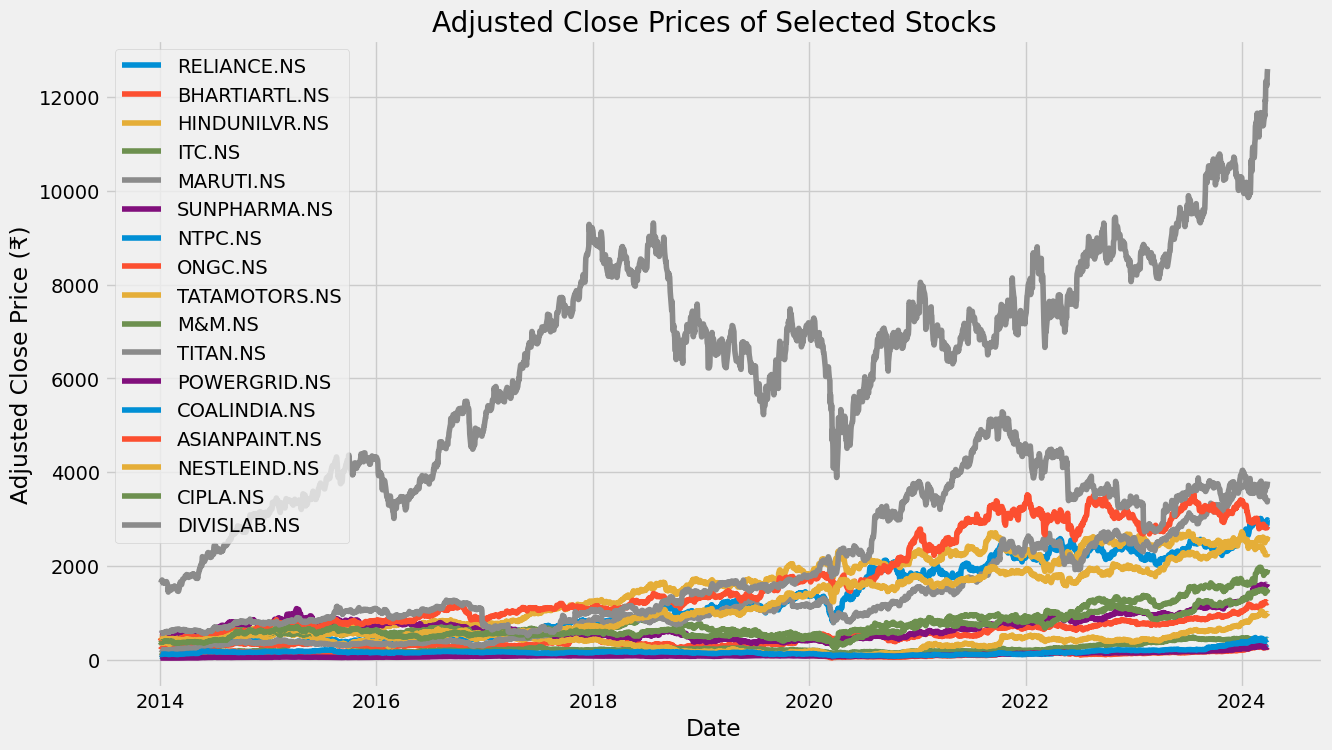

In [ ]:
plt.figure(figsize=(14, 8))
for ticker in selected_tickers:
    plt.plot(stock_data[ticker], label=ticker)
plt.title('Adjusted Close Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (₹)')
plt.legend()
plt.show()


In [ ]:
treemap_data = portfolio_stocks[['yf_symbol', 'industry', 'market_cap']]
fig = px.treemap(treemap_data, path=['industry', 'yf_symbol'], values='market_cap',
                 title='Market Cap Distribution by Industry')
fig.show()


### Final list of stocks for the **EQUITY** portfolio

We propose to build a equity portfolio consisting of **17** stocks spread across varied sectors. These stocks are very stable, highly liquid and forms the major constituent of NIFTY 50 Index